# **Machine Learning Mini Project**
# **Name: Milan Patel**
# **Sap Id: 60009220207**
# **Batch: D2-1**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv")

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


The abvoe data shows us that most of the columns in our data are of the data type "object". This information is usefull later when we are training our data on various models some of which might require us to encode and scale our data.

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Having no null values shows us that the data is rather clean. This helps lighten the load on the amount of preprocessing that needs to be done.

In [6]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [7]:
output = []
for col in df.columns:
    unique = df[col].nunique()
    colType = str(df[col].dtype)
    categories=df[col].unique()

    output.append([col, unique, colType,categories])

output = pd.DataFrame(output)
output.columns = ['colName','unique','dtype','categories']

display(output)

,colName,unique,dtype,categories
0,age,76,int64,"[59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 2..."
1,job,12,object,"[admin., technician, services, management, ret..."
2,marital,3,object,"[married, single, divorced]"
3,education,4,object,"[secondary, tertiary, primary, unknown]"
4,default,2,object,"[no, yes]"
5,balance,3805,int64,"[2343, 45, 1270, 2476, 184, 0, 830, 545, 1, 50..."
6,housing,2,object,"[yes, no]"
7,loan,2,object,"[no, yes]"
8,contact,3,object,"[unknown, cellular, telephone]"
9,day,31,int64,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


In the process of understaning the data, we need to also understand what kind of unique values arer presnt in our data. We can see that in this dataset, There are a few binary columns (yes and no), along with other columns that have 3, 4 or even multiple unique nalues.

In [8]:
binary_col = []
for col in df.columns:
  if df[col].nunique() == 2:
    binary_col.append(col)

binary_col

['default', 'housing', 'loan', 'deposit']

In [9]:
for col in binary_col:
  print(df[col].value_counts())

default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
deposit
no     5873
yes    5289
Name: count, dtype: int64


c:\Users\dwark\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dwark\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


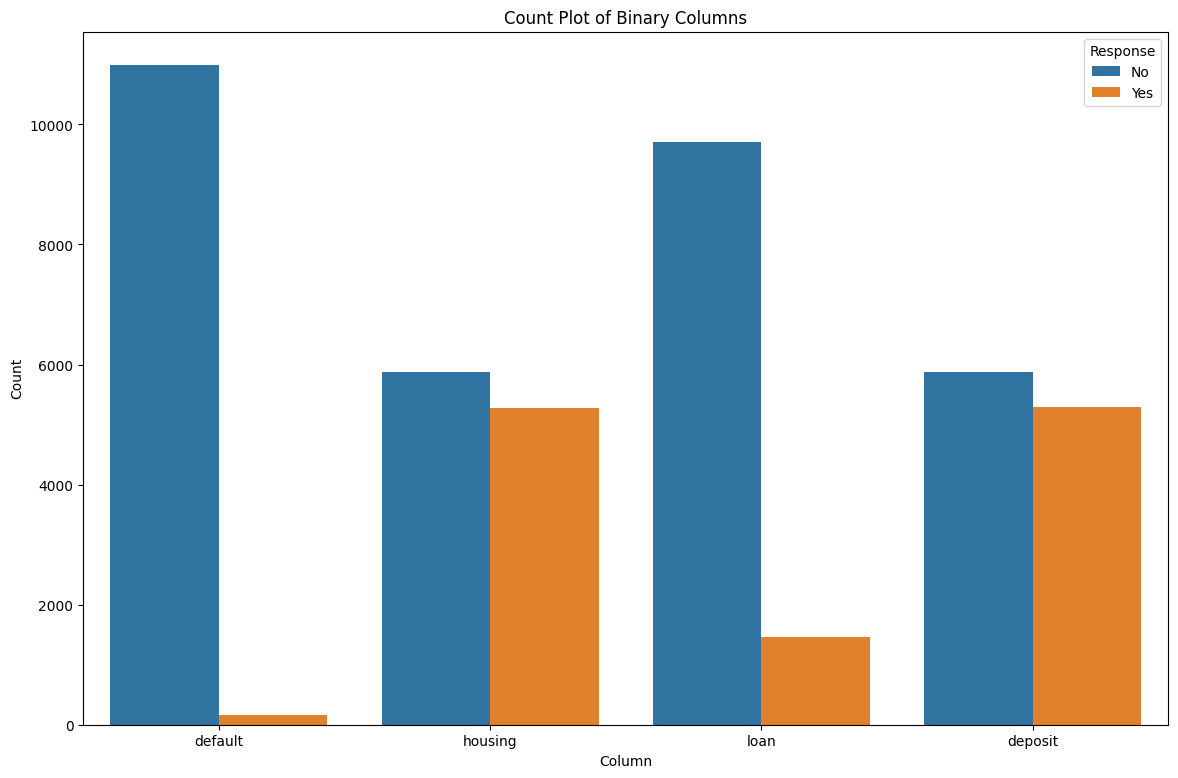

In [10]:
data_long = pd.melt(df, value_vars=binary_col, var_name='column', value_name='response')

plt.figure(figsize=(14, 9))
sns.countplot(data=data_long, x='column', hue='response')
plt.title('Count Plot of Binary Columns')
plt.xlabel('Column')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.xticks()
plt.show()

The above graph plots the count of various binary columns that are present in our data (namely default, housing, loan and deposit). We can see that amongst all the customers very few customers have defaulted in their payments and also only a small percentage of people have taken out a loan. We see a near even split in the housing column. The same is also seen in the deposit column which would show that nearly half the people had madde a deposit for the term deposit campaign that was run by the bank.

C:\Users\dwark\AppData\Local\Temp\ipykernel_18128\94990444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='job', y='age', palette = "Dark2")


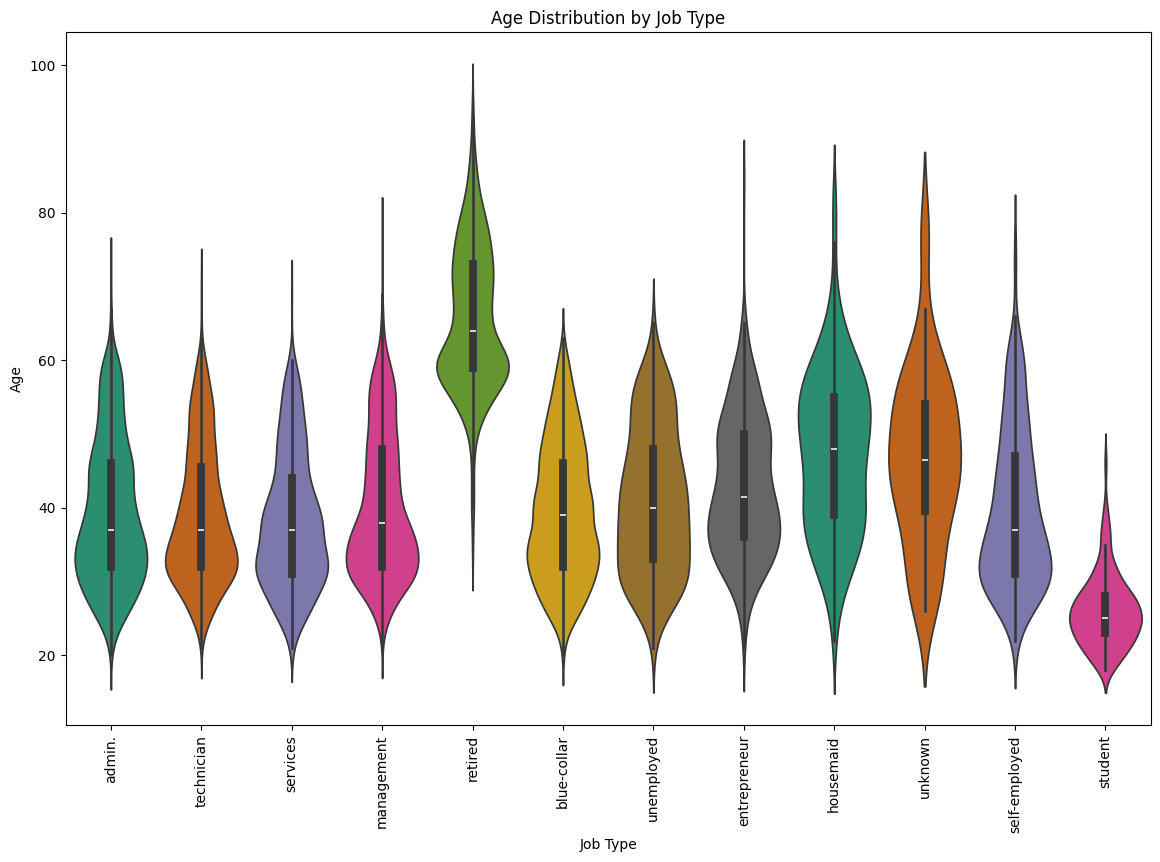

In [11]:
plt.figure(figsize=(14, 9))
sns.violinplot(data=df, x='job', y='age', palette = "Dark2")
plt.title('Age Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In the above graph we see that with the exception of two sections, most of the customers in our dataset lie in the age range of 30 - 50. Only the Students are the ones that reach below the 15 age mark and the customers that have retired go baove 60.

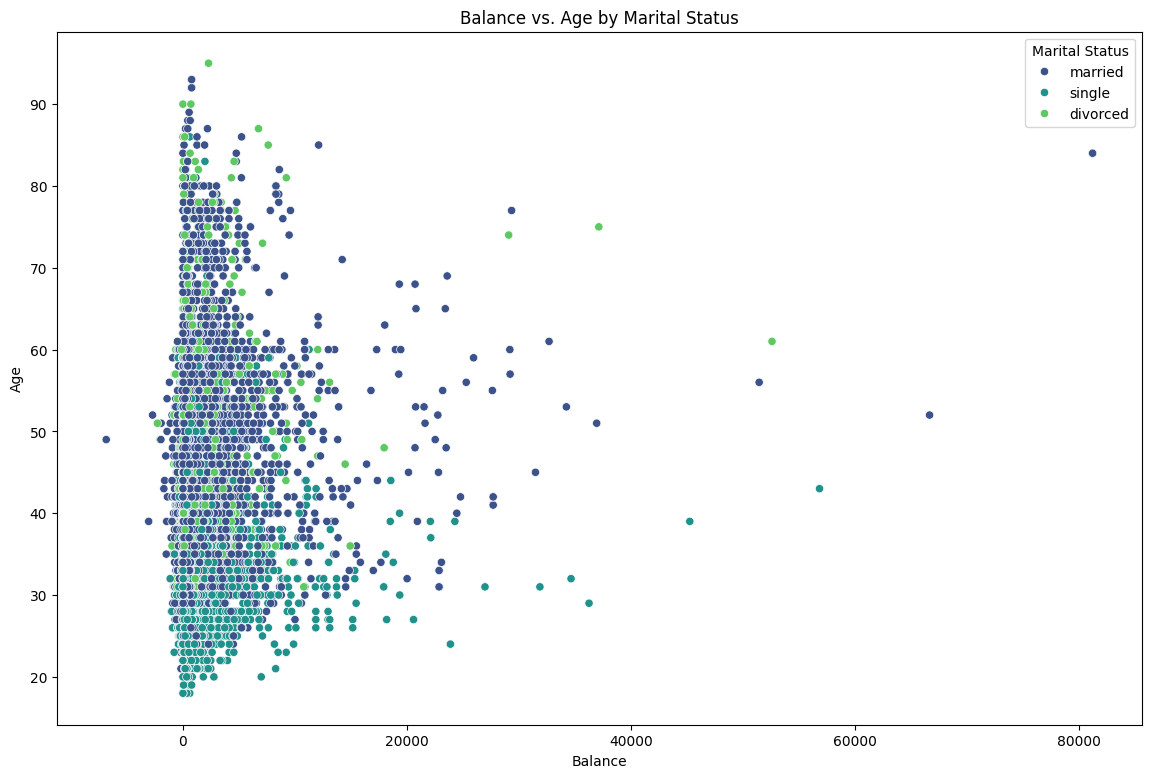

In [12]:
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df, x='balance', y='age', hue='marital', palette='viridis')
plt.title('Balance vs. Age by Marital Status')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.legend(title='Marital Status')
plt.show()

From the above scatter plot most of the customers that are in the age range of 20 - 30 are single. As we go up the age range more number of people are seen to have a martial status of 'married'. Also starting form 45 - 50, we see that people are also divorced.

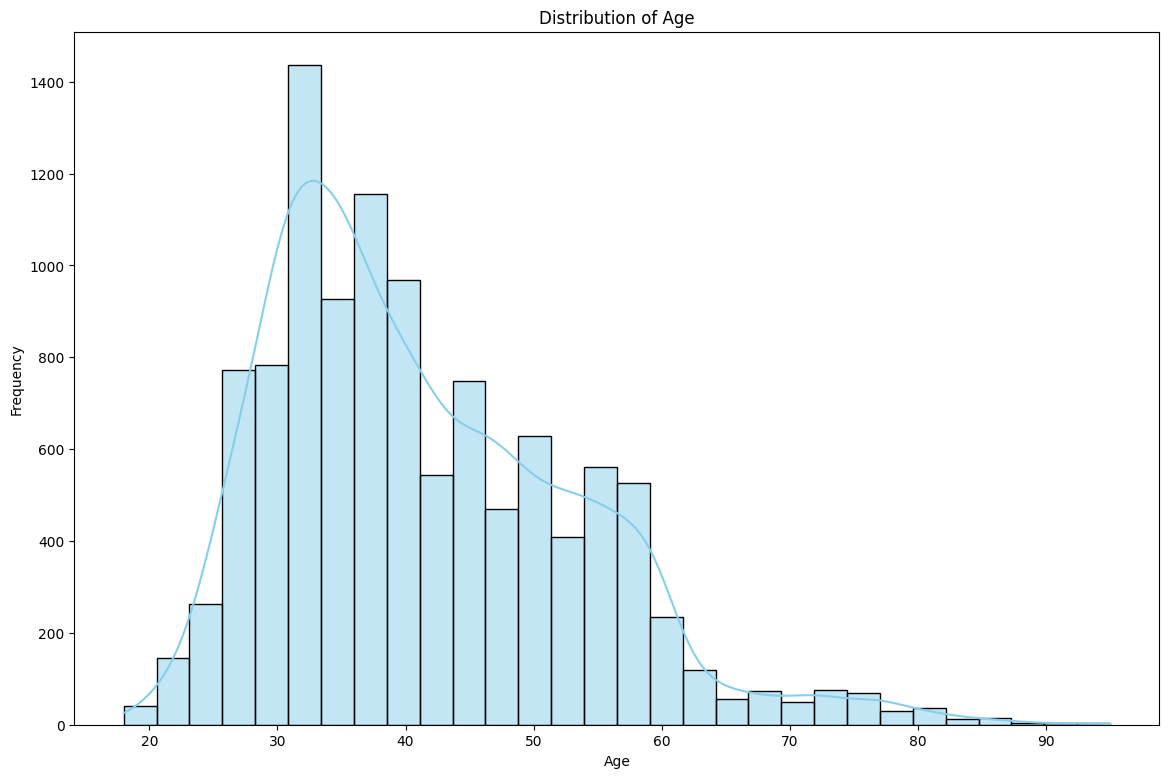

In [13]:
plt.figure(figsize=(14, 9))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the above distribution we see that most of the customers lie in the age group of 30 - 60. This could indicate our major customer base and help us plan our future campaigns.

c:\Users\dwark\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dwark\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\dwark\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dwark\AppData\Local\Programs\Python\Python312

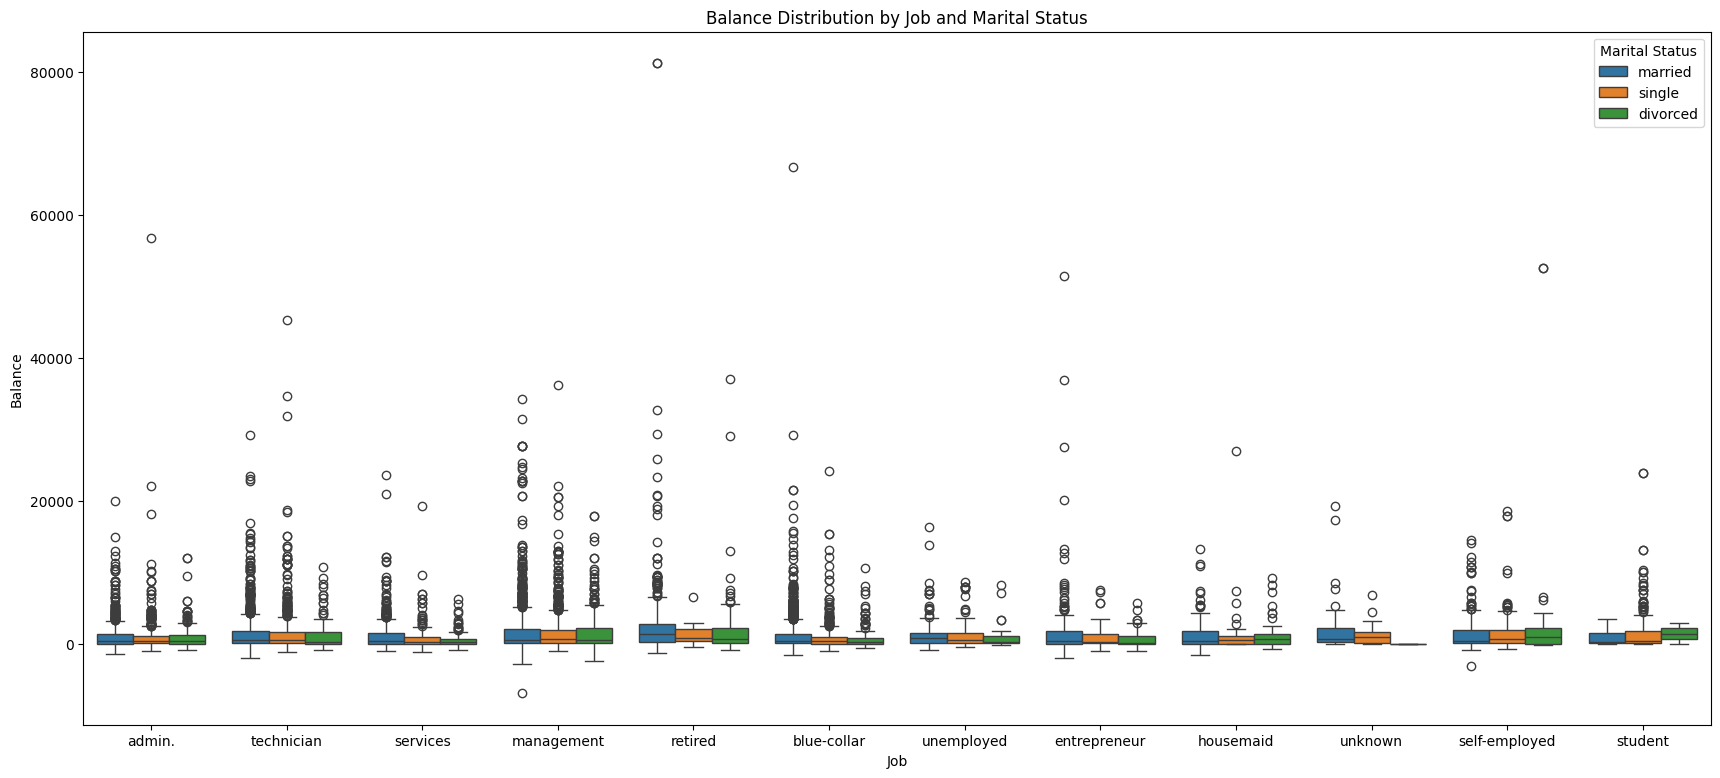

In [14]:
plt.figure(figsize=(21, 9))
sns.boxplot(data=df, x='job', y='balance', hue='marital')
plt.title('Balance Distribution by Job and Marital Status')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks()
plt.legend(title='Marital Status')
plt.show()

The above graph helps us understand the balance that people have across all the different job categories in our dataset. Although it is seen that most of the balance lie in the range of a few thousand, there seems to exist alot of outliers going up to 80000. This could point to the need of some scaling method to help us perform better analysis.

**Data Preprocessing**

Moving ahead with our pre processing, we first make a copy of our dataset into a variable called processed_df. All our pre processing with be conducted on our processed_df, leaving our main dataset intact if in case we require any unprocessed data from it.

In [15]:
processed_df = df.copy()

We sepearte our m=numeric columns to then fill in null values (if any) with the respective median of the columns.

In [16]:
numeric_col = []

for col in processed_df.columns:
  if processed_df[col].dtypes == "int64":
    numeric_col.append(col)

numeric_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
for col in numeric_col:
  processed_df[col].fillna(processed_df[col].median())

In [18]:
processed_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

As discussed earlier, our data contains multiple object data type columns. Here we label encode them to work with our model in the future.

We also make a list called categorical_col to seperate out the categorical columns in the dataset.

In [20]:
categorical_col = []

for col in processed_df.columns:
  if processed_df[col].dtypes == "object":
    categorical_col.append(col)

categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

Previously we had discussed the existence of outliers in our dataset. The StandardScaler library helps us scale the numeric values present in the dataset.

In [21]:
scaler = StandardScaler()

In [22]:
processed_df[numeric_col] = scaler.fit_transform(processed_df[numeric_col])

In [23]:
processed_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1.930226,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,3.154612,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,2.929901,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,0.596366,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,0.867171,-0.186785,-0.481184,-0.36326,unknown,yes


We had also discussed that our dataset conatained multiple columns with the data type "object". To work with these columns we label encode them with the library LabelEncoder().

In [24]:
le = LabelEncoder()

In [25]:
for col in categorical_col:
  processed_df[col] = le.fit_transform(processed_df[col])

In [26]:
processed_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,0,1,1,0,0.252525,1,0,2,-1.265746,8,1.930226,-0.554168,-0.481184,-0.36326,3,1
1,1.239676,0,1,1,0,-0.459974,0,0,2,-1.265746,8,3.154612,-0.554168,-0.481184,-0.36326,3,1
2,-0.019470,9,1,1,0,-0.080160,1,0,2,-1.265746,8,2.929901,-0.554168,-0.481184,-0.36326,3,1
3,1.155733,7,1,1,0,0.293762,1,0,2,-1.265746,8,0.596366,-0.554168,-0.481184,-0.36326,3,1
4,1.071790,0,1,2,0,-0.416876,0,0,2,-1.265746,8,0.867171,-0.186785,-0.481184,-0.36326,3,1


**Conclusion**

From the above task we have gone through the dataset in an attempt to understand the data we have at our hand. In the process we encountered multiple features of the dataset like the categoriacal columns, the oultiers in the dataset and we were sucessfull in handling them, to now run the dataset on our model.

# **Clustering**

In [27]:
from sklearn.model_selection import train_test_split
import warnings

In [28]:
warnings.filterwarnings("ignore")

In [29]:
# Split the dataset into features (X) and target variable (y)
X = processed_df.drop(columns=['deposit'])  # Features
y = processed_df['deposit']  # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [33]:
# Example of classification or regression (using other models like logistic regression, decision tree, etc.)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7899686520376176


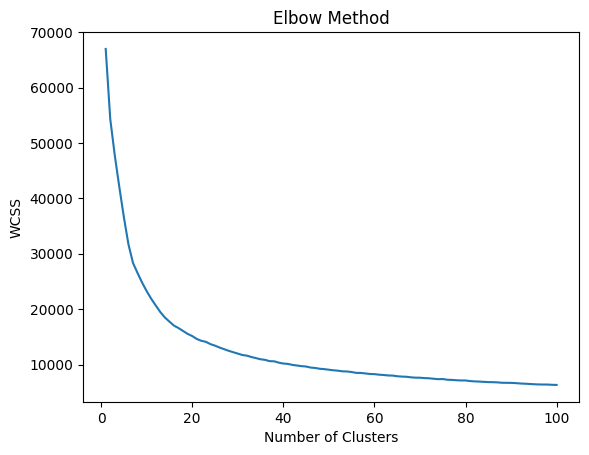

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 101):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 101), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

n_clusters = 100
silhouette_coefficients = []

for k in range(2, n_clusters+1):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(16, 9))
plt.plot(range(2, n_clusters+1), silhouette_coefficients)
plt.xticks(range(2, n_clusters+1))
plt.xlabel("Number of Clusters")
plt.xticks(rotation = 90)
plt.ylabel("Silhouette Coefficient")
plt.show()

KeyboardInterrupt: 

Cluster Centers:
          age       balance     duration   campaign       pdays      previous
0   30.369613    523.224982   182.558802   1.406866   -0.772096  1.314828e-02
1   34.309302    814.067442   239.260465   1.909302  338.651163  2.039535e+00
2   35.294798   1106.179191  1498.641618   2.375723    3.046243  5.202312e-02
3   73.603239   1896.206478   328.068826   1.854251    3.813765  6.882591e-02
4   33.500000   4437.250000   246.618280   1.806452    3.368280  7.526882e-02
5   41.383117    981.103896   219.532468  13.246753    0.285714  3.896104e-02
6   58.285714   1844.511278   358.398496   2.195489  163.729323  7.285714e+00
7   52.000000  51738.400000   575.000000   1.400000   37.000000  2.000000e-01
8   51.331461   1259.766854   243.429775   1.598315  146.258427  2.092697e+00
9   42.149580    607.688235   181.385714   1.576471   -0.498319  1.596639e-02
10  34.750000   2570.916667   501.500000   3.500000  244.833333  2.775000e+01
11  38.425532    539.872340   146.851064  24.12

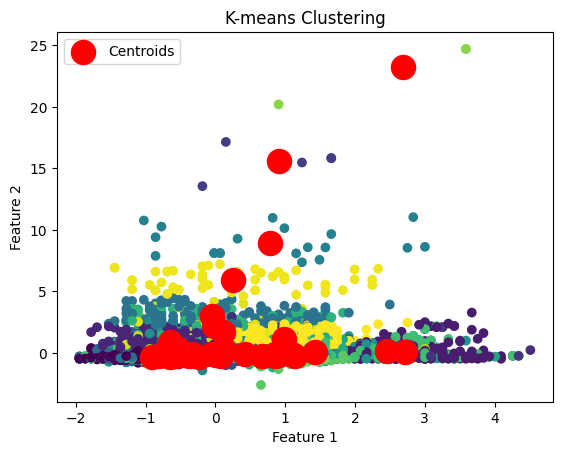

In [ ]:
# Based on the elbow method, let's choose 40 clusters
n_clusters = 40

# Performing K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original dfset
df['cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

# Visualize the clusters (for 2D df)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [36]:
le_encoded_df = df.copy()

In [37]:
for col in categorical_col:
  le_encoded_df[col] = le.fit_transform(le_encoded_df[col])

In [38]:
le_encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


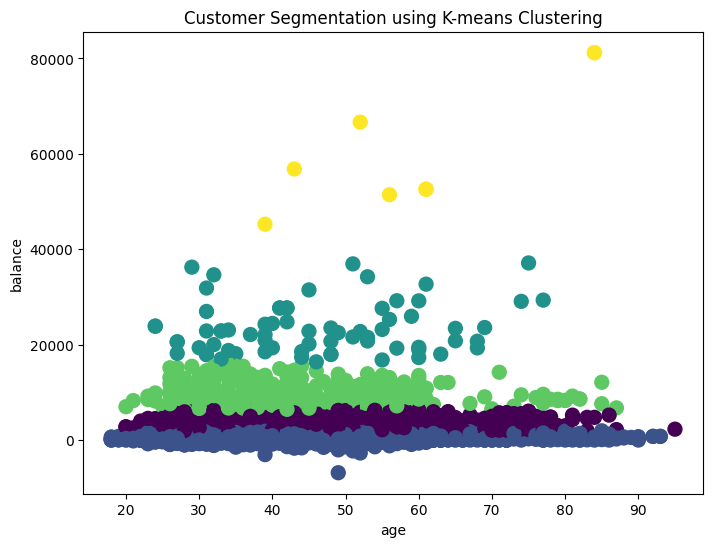

Cluster Centers:
   Scaled age       balance
0   44.092052   3401.940644
1   40.386634    467.405480
2   46.000000  23325.563380
3   43.780269   9219.800448
4   60.000000  60969.125000


In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['age', 'balance']
X = le_encoded_df[features]

# Apply StandardScaler to 'age' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age']])

# Concatenate scaled 'age' with 'balance' column
X_processed = np.concatenate([X_scaled, X[['balance']].values], axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_processed)

# Add cluster labels to the original dataframe
le_encoded_df['cluster'] = kmeans.labels_

# Visualize the clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(le_encoded_df['age'], le_encoded_df['balance'], c=le_encoded_df['cluster'], cmap='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# Display cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_[:, :-1]), columns=['Scaled age'])
cluster_centers['balance'] = kmeans.cluster_centers_[:, -1]
print("Cluster Centers:")
print(cluster_centers)


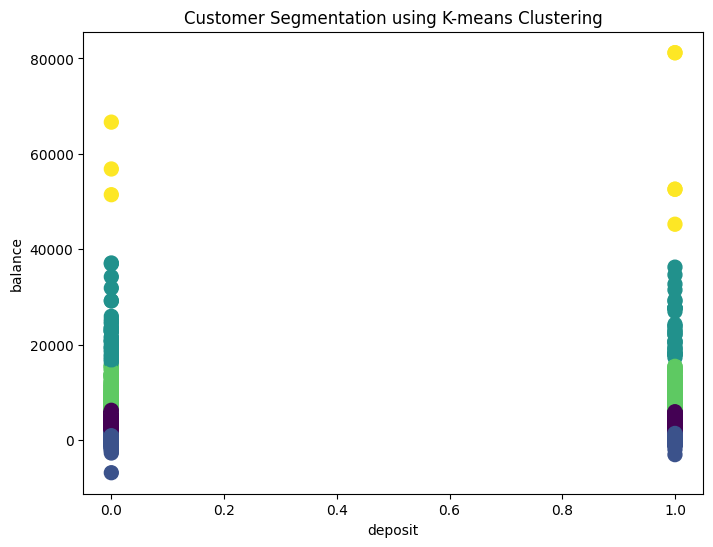

Cluster Centers:
   Scaled deposit       balance
0        0.580483   3401.940644
1        0.443635    467.405480
2        0.492958  23325.563380
3        0.578475   9219.800448
4        0.625000  60969.125000


In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['deposit', 'balance']
X = le_encoded_df[features]

# Apply StandardScaler to 'deposit' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['deposit']])

# Concatenate scaled 'deposit' with 'balance' column
X_processed = np.concatenate([X_scaled, X[['balance']].values], axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_processed)

# Add cluster labels to the original dataframe
le_encoded_df['cluster'] = kmeans.labels_

# Visualize the clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(le_encoded_df['deposit'], le_encoded_df['balance'], c=le_encoded_df['cluster'], cmap='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('deposit')
plt.ylabel('balance')
plt.show()

# Display cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_[:, :-1]), columns=['Scaled deposit'])
cluster_centers['balance'] = kmeans.cluster_centers_[:, -1]
print("Cluster Centers:")
print(cluster_centers)


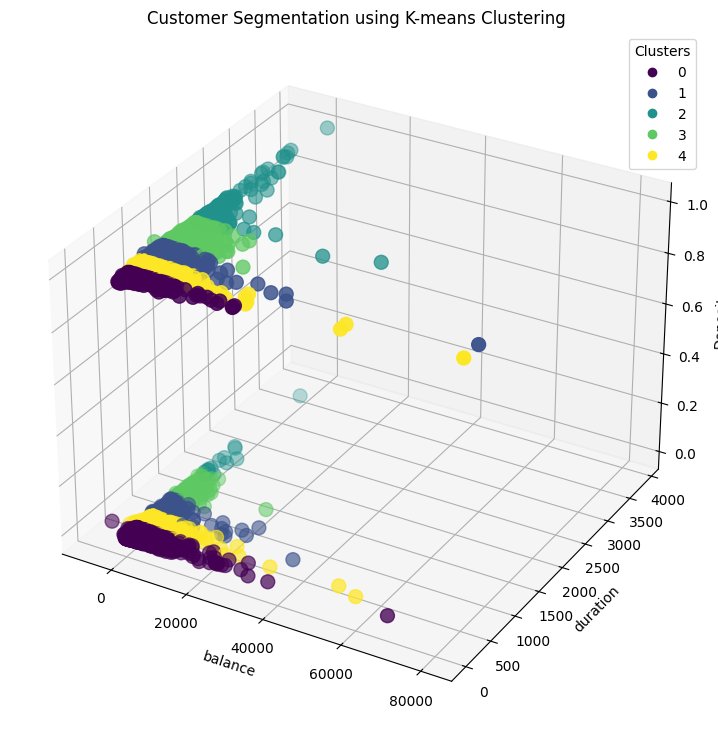

Cluster Centers:
   Scaled balance  Scaled deposit     duration
0     1396.416456        0.241413   129.576751
1     1619.243414        0.777778   654.202176
2     1925.388298        0.920213  1782.718085
3     1542.151943        0.892815  1074.772674
4     1663.779913        0.544327   339.310601


In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting capabilities

# Select features for clustering
features = ['balance', 'duration', 'deposit']
X = le_encoded_df[features]

# Apply StandardScaler to numerical features ('balance' and 'deposit')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['balance', 'deposit']])

# Concatenate scaled features with the categorical 'duration' column
X_processed = np.concatenate([X_scaled, X[['duration']].values], axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_processed)

# Add cluster labels to the original dataframe
le_encoded_df['cluster'] = kmeans.labels_

# Visualize the clusters in 3D
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(le_encoded_df['balance'], le_encoded_df['duration'], le_encoded_df['deposit'], c=le_encoded_df['cluster'], cmap='viridis', s=100)
ax.set_title('Customer Segmentation using K-means Clustering')
ax.set_xlabel('balance')
ax.set_ylabel('duration')
ax.set_zlabel('Deposit')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

# Display cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_[:, :-1]), columns=['Scaled balance', 'Scaled deposit'])
cluster_centers['duration'] = kmeans.cluster_centers_[:, -1]
print("Cluster Centers:")
print(cluster_centers)


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb

# Splitting into features and target
X = processed_df.drop('deposit', axis=1)
y = processed_df['deposit']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate models using k-fold cross-validation
num_folds = 10  # Number of folds for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"{name}")
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    # Fit the model on full training data for final evaluation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{confusion}")
    print("---------------------------------------------")


Decision Tree
Cross-Validation Mean Accuracy: 0.7800 (±0.0143)
Test Set Accuracy: 0.7640
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233

Confusion Matrix:
[[917 249]
 [278 789]]
---------------------------------------------
Logistic Regression
Cross-Validation Mean Accuracy: 0.7976 (±0.0105)
Test Set Accuracy: 0.7895
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Confusion Matrix:
[[955 211]


In [3]:
X = processed_df.drop('deposit', axis=1)
y = processed_df['deposit']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'processed_df' is not defined

In [44]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [45]:
df['deposit'] = le.fit_transform(df['deposit'])

In [46]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [2]:
import xgboost as xgb
import pickle

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

pickle.dump(model, open('model.pkl', 'wb'))

NameError: name 'X_train' is not defined

In [48]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,-1.110730,8,2,2,0,1.306081,0,0,0,-0.671947,11,1.930226,0.915364,1.367034,0.945695,0
11150,-0.607072,4,1,1,0,-0.363858,0,0,0,0.634410,1,-0.167075,0.180598,-0.481184,-0.363260,3
5173,0.568131,10,0,1,0,-0.411606,0,0,0,-0.671947,9,0.639579,-0.554168,0.364766,0.073059,2
3017,0.987846,2,1,2,0,0.134085,0,0,0,-0.078148,2,-0.060481,-0.554168,-0.481184,-0.363260,3
2910,0.987846,4,1,2,0,0.029598,0,0,0,-0.553187,9,-0.593449,0.180598,0.419937,2.690969,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.484188,4,1,2,0,-0.237977,1,0,0,-0.553187,5,-0.841207,-0.186785,-0.481184,-0.363260,3
5191,-1.110730,6,2,2,0,-0.424628,0,0,0,0.040612,9,0.221848,-0.186785,-0.168550,1.382014,2
5390,-0.523129,9,1,1,0,-0.119227,0,0,0,0.515650,1,-0.504141,3.854427,-0.481184,-0.363260,3
860,0.819960,5,1,2,0,-0.242627,0,0,0,1.109449,1,0.000018,0.915364,-0.481184,-0.363260,3


In [49]:
input_df = [[59,1,2,1,1,2343,1,0,0,5,5,1042,1,1,0,1]]

y_pred = model.predict(input_df)

print(y_pred)

[1]


In [1]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib
from flask_cors import CORS

app = Flask(__name__)
CORS(app) 

try:
    model = joblib.load('model.pkl')
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

def preprocess_input(data):
    # Converting all the necessary columns to numeric type
    numeric_columns = data.columns
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, downcast="integer", errors='coerce')
    
    return data

@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not available'})

    try:
        # Getting the data from the request
        input_data = request.get_json()

        # Create a DataFrame from the input data
        input_df = pd.DataFrame([input_data])

        # Preprocessing the input data
        input_df = preprocess_input(input_df)
        print(input_df.info())
        # print(input_df[0])
        
        # Makeing predictions using the loaded model
        prediction = model.predict(input_df)

        response = {
            'prediction': prediction.tolist(),
            # 'probabilities': probabilities.tolist() if probabilities is not None else None
        }

        # Return the response as JSON
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True,use_reloader=False, port=8080)  # Run the Flask app on port 8080 in debug mode


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [26/Apr/2024 15:24:47] "OPTIONS /predict HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2024 15:24:47] "POST /predict HTTP/1.1" 200 -


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        1 non-null      int8 
 1   job        1 non-null      int8 
 2   marital    1 non-null      int8 
 3   education  1 non-null      int8 
 4   default    1 non-null      int8 
 5   balance    1 non-null      int16
 6   housing    1 non-null      int8 
 7   loan       1 non-null      int8 
 8   contact    1 non-null      int8 
 9   day        1 non-null      int8 
 10  month      1 non-null      int8 
 11  duration   1 non-null      int16
 12  campaign   1 non-null      int8 
 13  pdays      1 non-null      int8 
 14  previous   1 non-null      int8 
 15  poutcome   1 non-null      int8 
dtypes: int16(2), int8(14)
memory usage: 150.0 bytes
None
